### Scheduling simulation program

> 스케쥴링 기준

- 중앙처리장치 이용률
    running time / (runningtime + idle_time)

- 처리율
    프로세스의 갯수 / 총시간 

- 반환시간, 소요시간(turnaround time)
    종료시간 - 도착시간 

- 대기시간
    레디큐에서 기다린 시간
    
- 응답시간
    작업이 처음 시작한 시간 

### JSON 파일 변환을 위한 기본 함수
> JSON 파일 안의 내용을 사용 가능한 값으로 바꾸어주고 

> preemptive 속성과 process time 속성을 각각 뽑아준다

- 프로세스는 index(idx), burst_time, arrival_time, priority 속성을 가진다

In [114]:
import json
# json파싱을 위한 import


def make_process(data):
    # 파싱 한 후 숫자로 변환
    
    pro_num = len(data['process'])
    
    process = list()

    
    
        
    if(data['real-time']['real-time']=='true'):
        for i in range(0,pro_num):
            process.append(data['process'][i])
            process[i]['process_idx'] = int(process[i]['process_idx'])
            process[i]['burst_time'] = int(process[i]['burst_time'])
            process[i]['arrival_time']=int(process[i]['arrival_time'])
            process[i]['priority']=int(process[i]['priority'])
            process[i]['periode']=int(process[i]['periode'])
    else:
        for i in range(0,pro_num):
            process.append(data['process'][i])
            process[i]['process_idx'] = int(process[i]['process_idx'])
            process[i]['burst_time'] = int(process[i]['burst_time'])
            process[i]['arrival_time']=int(process[i]['arrival_time'])
            process[i]['priority']=int(process[i]['priority'])

            
         
    
    return process


### 간트차트를 그리기 위한 함수

> 함수에서 차트를 그리기 위해 넘어오는 값은 각 시간별 러닝스테이트의 인덱스

> 이용하는 컬러맵은 tab20 컬러맵이며 pyplot의 컬러맵 매서드를 이용가능하다

> 그리는 방식은 해당하는 시간마다 프로세스별 차트의 색을 다르게 하여 나타낸다

In [115]:
import matplotlib.pyplot as plt

def draw_schedule(data):
    values = list(set(data))
    values.sort()
    colors = plt.cm.tab20.colors

    value_color_map = {value: colors[i % len(colors)] for i, value in enumerate(values)}

    fig, ax = plt.subplots()
    y_pos = 5

    for idx, value in enumerate(data):
        ax.barh(y_pos, 1, left=idx, color=value_color_map[value], height=0.8)

    ax.set_title('Scheduling Gantt chart')
    ax.legend([plt.Rectangle((0, 0), 1, 1, fc=value_color_map[val]) for val in values], values)

    ax.set_ylim(0,10)

    plt.show()


### FCFS(First-come-First-Served)
> 비선점형 스케쥴링 방식

> 비선점형이므로 임의의 초기 프로세스를 실행한다

In [116]:
def FCFS(process) :

    pro_num = len(process)
    
    left_time = [0] * pro_num
    
    run_idx = -1
    
    running_time = 0
    
    res = [-1]*pro_num
    
    term = [0]*pro_num
    
    for i in range(0,pro_num):
       
        left_time[i] = process[i]['burst_time']
    
    ret = list()
    idx_ret = list()
    
    while(True):
        
        if(run_idx < 0):
            run_idx = 0
            if(res[run_idx] == -1):
                res[run_idx] = running_time
        
        
        for i in range(0,pro_num):
            if(i == run_idx):
                left_time[i] = left_time[i] - 1

        idx_ret.append(run_idx)
        
        running_time = running_time + 1 
        
        if(left_time[run_idx] == 0):
            term[run_idx] = running_time
            
            if(run_idx == (pro_num-1)):
                break
            else:
                run_idx = run_idx + 1
                if(res[run_idx] == -1):
                    res[run_idx] = running_time
    

    
  
    
    ret.append(idx_ret)
    
    criteria = list()
    
    utilization = len(idx_ret) / running_time
    throughput = pro_num / running_time
    temp1 = 0
    temp2=0
    for i in range(0,pro_num):
        temp1 = temp1 + term[i]
        temp2 = temp2 + res[i]
    turnaround = temp1 / pro_num
    waiting = temp2/pro_num
    response = temp2/pro_num
    
    criteria.append({"utilization":utilization})
    criteria.append({"throughput":throughput})
    criteria.append({"turnaround":turnaround})
    criteria.append({"waiting":waiting})
    criteria.append({"response":response})
    
    ret.append(criteria)

    
    return ret

[{'utilization': 1.0}, {'throughput': 0.25}, {'turnaround': 11.5}, {'waiting': 7.5}, {'response': 7.5}]


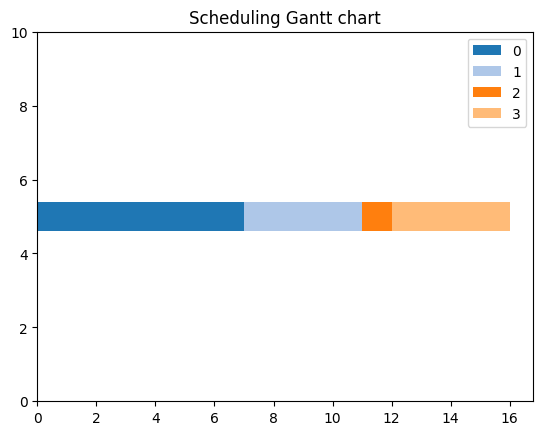

In [117]:
import json

with open('./process.json','r') as f:
    data = json.load(f)
    
process = make_process(data)

ret = FCFS(process)
print(ret[1])
draw_schedule(ret[0])

### SJF(Shortest-Job-First) non-preemptive

> 비선점 형

> 가장 짧은 길이의 업무를 먼저 처리하는 방식

> 위의 FCFS에서 일어날 수 있는 Convoy effect(호위효과)를 해결하기 위해 나온 방식

In [118]:
def SJF_non(process):
    
    pro_num = len(process)
    
    left_time = [0] * pro_num
    
    run_idx = -1
    
    running_time = 0
    
    res = [-1]*pro_num
    
    term = [0]*pro_num
    
    f_check = 0
    
    for i in range(0,pro_num):
       
        left_time[i] = process[i]['burst_time']
        
    idx_ret = list()    
    
    ret = list()
    
    min = 0
    
    while(True):
        
        for i in range(0,pro_num):
            f_check = f_check + left_time[i]
        
        if(f_check == 0):
            term[run_idx] = running_time
            break
        f_check = 0
        
        if(run_idx < 0):
            for i in range(0,pro_num):
                if(process[min]['burst_time']>process[i]['burst_time']):
                    min = i
            run_idx = min
            if(res[run_idx] == -1):
                res[run_idx]=running_time
        
        if(left_time[run_idx] == 0):
            term[run_idx] = running_time
            for i in range(0,pro_num):
                if(left_time[i]>0):
                    min = i
            for i in range(0,pro_num):
                if(left_time[i]>0):
                    if(process[min]['burst_time']>process[i]['burst_time']):
                        min = i
            run_idx = min
            if(res[run_idx]==-1):
                res[run_idx] = running_time
        

        
        
        
        idx_ret.append(run_idx)
        running_time = running_time + 1 
        left_time[run_idx] = left_time[run_idx] - 1
        
    
            
    
    ret.append(idx_ret)

    criteria = list()
    
    utilization = len(idx_ret) / running_time
    throughput = pro_num / running_time
    temp1 = 0
    temp2=0
    for i in range(0,pro_num):
        temp1 = temp1 + term[i]
        temp2 = temp2 + res[i]
    turnaround = temp1 / pro_num
    waiting = temp2/pro_num
    response = temp2/pro_num
    
    criteria.append({"utilization":utilization})
    criteria.append({"throughput":throughput})
    criteria.append({"turnaround":turnaround})
    criteria.append({"waiting":waiting})
    criteria.append({"response":response})
    
    ret.append(criteria)
    
    return ret

[{'utilization': 1.0}, {'throughput': 0.25}, {'turnaround': 7.75}, {'waiting': 3.75}, {'response': 3.75}]


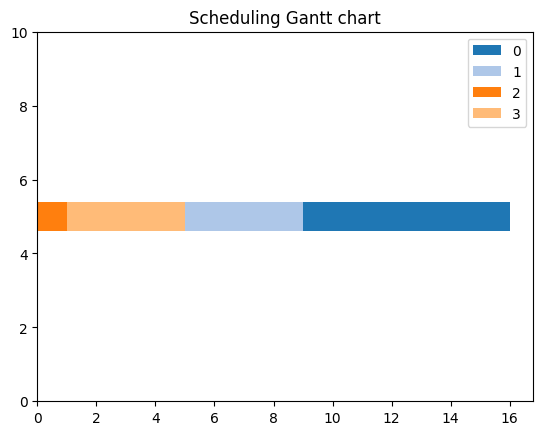

In [119]:
with open('./process.json','r') as f:
    data = json.load(f)

process = make_process(data)

ret = SJF_non(process)
print(ret[1])
draw_schedule(ret[0])

### SJF(Shortest-Job-First) preemptive

> 선점 형

> 가장 짧은 길이의 업무를 먼저 처리하는 방식

> 도착시간에 따라 스케쥴링이 일어나며 당시의 가장 짧은 업무를 실행한다

In [120]:
def SJF_pre(process):
    
    # num of process
    pro_num = len(process)
    
    # total time
    running_time = 0
    
    # each process's left time
    left_time = [0] * pro_num
    
    for i in range(0,pro_num):
        left_time[i] = process[i]['burst_time']
    
    # running state's idx
    run_idx = -1
    
    # ready queue flag
    ready_flag = [0] * pro_num
    
    # shortest idx buffer
    short_buf = -1
    
    # response time array
    res = [-1] * pro_num
    
    # terminate time
    term = [0] * pro_num
    
    idx_ret = list()
    
    ret = list()
    
    while(True):
        
        if(left_time[run_idx] == 0):
            ready_flag[run_idx] = -1
            term[run_idx] = running_time
            
        for i in range(0,pro_num):
            if(process[i]['arrival_time']==running_time):
                ready_flag[i]=1
                
                if(run_idx == -1):
                    run_idx = i
                    res[run_idx] = running_time
                    
                
                else:
                    if(process[run_idx]['burst_time']>process[i]['burst_time']):
                        run_idx = i
                        
            elif(left_time[run_idx]==0):
                
                for i in range(0,pro_num):
                    if(ready_flag[i] == 1):
                        short_buf = i
                        
                for i in range(0,pro_num):
                    if(ready_flag[i] == 1):
                        if(process[short_buf]['burst_time']>process[i]['burst_time']):
                            short_buf = i
                run_idx = short_buf
        
        
        
        if(res[run_idx]==-1):
         res[run_idx] = running_time
        
        if(left_time[run_idx]==0):
            break
        
        idx_ret.append(run_idx)
        left_time[run_idx] = left_time[run_idx]-1
        running_time = running_time +1
    
    
        
    ret.append(idx_ret)
    
    criteria = list()
    
    utilization = len(idx_ret) / running_time
    throughput = pro_num / running_time
    temp1 = 0
    temp2 = 0
    temp3 = 0
    
    for i in range(0,pro_num):
        temp1 = temp1 + term[i] - process[i]['arrival_time']
        temp2 = temp2 + term[i] - process[i]['arrival_time'] - process[i]['burst_time']
        temp3 = temp3 + res[i] - process[i]['arrival_time']
    turnaround = temp1 / pro_num
    waiting = temp2/pro_num
    response = temp3/pro_num
    
    criteria.append({"utilization":utilization})
    criteria.append({"throughput":throughput})
    criteria.append({"turnaround":turnaround})
    criteria.append({"waiting":waiting})
    criteria.append({"response":response})
    
    ret.append(criteria)


    
    return ret

[{'utilization': 1.0}, {'throughput': 0.25}, {'turnaround': 7.0}, {'waiting': 3.0}, {'response': 0.5}]


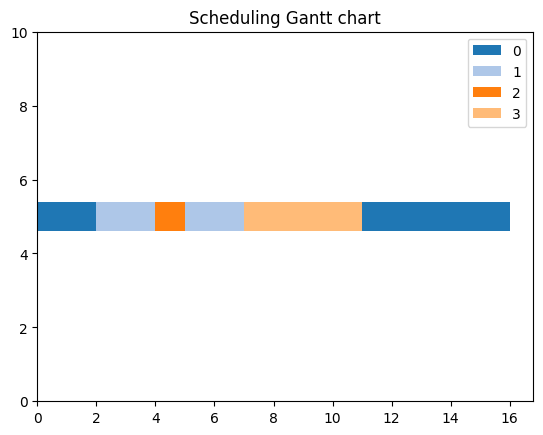

In [121]:
with open('./process.json','r') as f:
    data = json.load(f)

process = make_process(data)



ret = SJF_pre(process)
print(ret[1])
draw_schedule(ret[0])

### SRTF(Shortest-Remaining Time First)

> 선점형

> 새로운 프로세스가 들어온 경우 당시 가장 적게 남은 잡을 실행한다

In [122]:
def SRTF(process):
    
    # num of process
    pro_num = len(process)
    
    # total time
    running_time = 0
    
    # each process's left time
    left_time = [0] * pro_num
    
    for i in range(0,pro_num):
        left_time[i] = process[i]['burst_time']
    
    # running state's idx
    run_idx = -1
    
    # ready queue flag
    ready_flag = [0] * pro_num
    
    # shortest idx buffer
    short_buf = -1
    
    # response time array
    res = [-1] * pro_num
    
    # terminate time
    term = [0] * pro_num
    
    idx_ret = list()
    
    ret = list()
    
    while(True):
        
        if(left_time[run_idx] == 0):
            ready_flag[run_idx] = -1
            term[run_idx] = running_time
        
        for i in range(0,pro_num):
            if(process[i]['arrival_time']==running_time):
                ready_flag[i]=1
                
                if(run_idx == -1):
                    run_idx = i
                    res[run_idx] = running_time
                
                else:
                    if(left_time[run_idx]>left_time[i]):
                        run_idx = i
            elif(left_time[run_idx]==0):
                
                for i in range(0,pro_num):
                    if(ready_flag[i] == 1):
                        short_buf = i
                        
                for i in range(0,pro_num):
                    if(ready_flag[i] == 1):
                        if(left_time[short_buf]>left_time[i]):
                            short_buf = i
                            
                run_idx = short_buf
        if(res[run_idx]==-1):
         res[run_idx] = running_time

        
        if(left_time[run_idx]==0):
            break
            
        idx_ret.append(run_idx)
        left_time[run_idx] = left_time[run_idx]-1
        running_time = running_time +1
    
    
    ret.append(idx_ret)
    
    criteria = list()
    
    utilization = len(idx_ret) / running_time
    throughput = pro_num / running_time
    temp1 = 0
    temp2 = 0
    temp3 = 0
    
    for i in range(0,pro_num):
        temp1 = temp1 + term[i] - process[i]['arrival_time']
        temp2 = temp2 + term[i] - process[i]['arrival_time'] - process[i]['burst_time']
        temp3 = temp3 + res[i] - process[i]['arrival_time']
    turnaround = temp1 / pro_num
    waiting = temp2/pro_num
    response = temp3/pro_num
    
    criteria.append({"utilization":utilization})
    criteria.append({"throughput":throughput})
    criteria.append({"turnaround":turnaround})
    criteria.append({"waiting":waiting})
    criteria.append({"response":response})
    
    ret.append(criteria)
    
    

    return ret

[{'utilization': 1.0}, {'throughput': 0.25}, {'turnaround': 7.0}, {'waiting': 3.0}, {'response': 0.5}]


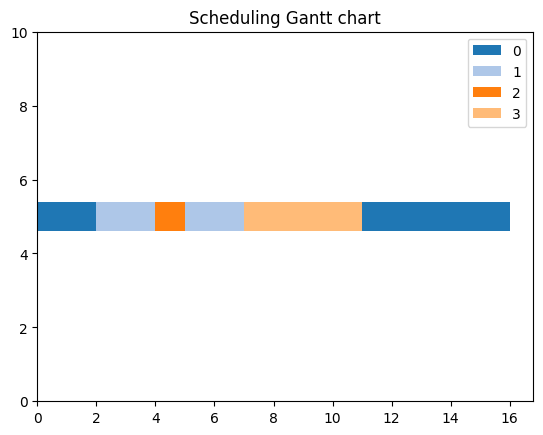

In [123]:
with open('./process.json','r') as f:
    data = json.load(f)

process = make_process(data)

ret = SRTF(process)
print(ret[1])
draw_schedule(ret[0])

### Priority (Non - preemptive)

> 비선점형 방식

> 우선순위에 따라 프로세스 스케쥴링을 실행


In [124]:
def Priority(process) :
    
    # num of process
    pro_num = len(process)
    
    # total time
    running_time = 0
    
    # each process's left time
    left_time = [0] * pro_num
    
    for i in range(0,pro_num):
        left_time[i] = process[i]['burst_time']
    
    # running state's idx
    run_idx = -1
    
    # response time array
    res = [-1] * pro_num
    
    # terminate time
    term = [0] * pro_num
    
    f_check = 0
    
    hi_pri = process[0]['priority']
    
    done = [0] * pro_num
    
    idx_ret = list()
    
    ret = list()
    
    while(True):
        
        if(run_idx == -1):
            for i in range(0,pro_num):
                if(process[hi_pri]['priority']>process[i]['priority']):
                    hi_pri = i
            run_idx = hi_pri
            res[run_idx]= running_time
            
            
        
        if(left_time[run_idx] == 0):
            term[run_idx] = running_time
            done[run_idx] = 1
            for i in range(0,pro_num):
                if(done[i] == 0):
                    hi_pri = i
            for i in range(0,pro_num):
                if(done[i] == 0):
                    if(process[hi_pri]['priority']>process[i]['priority']):
                        hi_pri = i
            
            run_idx = hi_pri
            if(res[run_idx] == -1):
                res[run_idx] = running_time
                    
            
        idx_ret.append(run_idx)
        left_time[run_idx] = left_time[run_idx] -1
        running_time = running_time +1
        
        for i in range(0,pro_num):
            f_check = f_check + left_time[i]
        
        if(f_check == 0):
            term[run_idx] = running_time
            break
        f_check = 0
    
    
    ret.append(idx_ret)
    
    criteria = list()
    
    utilization = len(idx_ret) / running_time
    throughput = pro_num / running_time
    temp1 = 0
    temp2 = 0
    temp3 = 0
    
    for i in range(0,pro_num):
        temp1 = temp1 + term[i] 
        temp2 = temp2 + term[i] - process[i]['burst_time']
        temp3 = temp3 + res[i] 
    turnaround = temp1 / pro_num
    waiting = temp2/pro_num
    response = temp3/pro_num
    
    criteria.append({"utilization":utilization})
    criteria.append({"throughput":throughput})
    criteria.append({"turnaround":turnaround})
    criteria.append({"waiting":waiting})
    criteria.append({"response":response})
    
    ret.append(criteria)

    return ret

[{'utilization': 1.0}, {'throughput': 0.25}, {'turnaround': 8.5}, {'waiting': 4.5}, {'response': 4.5}]


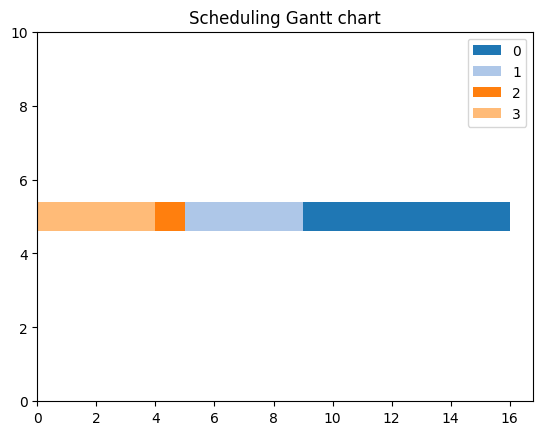

In [125]:
with open('./process.json','r') as f:
    data = json.load(f)

process = make_process(data)

ret = Priority(process)
print(ret[1])
draw_schedule(ret[0])

### Priority (Aging)

> 1 단위시간에 1의 우선순위가 올라가게 해준다.

In [126]:
def Priority_aging(process) :
    
    # num of process
    pro_num = len(process)
    
    # total time
    running_time = 0
    
    # each process's left time
    left_time = [0] * pro_num
    
    for i in range(0,pro_num):
        left_time[i] = process[i]['burst_time']
    
    # running state's idx
    run_idx = -1
    
    # response time array
    res = [-1] * pro_num
    
    # terminate time
    term = [0] * pro_num
    
    f_check = 0
    
    hi_pri = process[0]['priority']
    
    done = [0] * pro_num
    
    idx_ret = list()
    
    ret = list()
    
    while(True):
        
        if(run_idx == -1):
            for i in range(0,pro_num):
                if(process[hi_pri]['priority']>process[i]['priority']):
                    hi_pri = i
            run_idx = hi_pri
            res[run_idx]= running_time
            
            
        
        if(left_time[run_idx] == 0):
            term[run_idx] = running_time
            done[run_idx] = 1
            for i in range(0,pro_num):
                if(done[i] == 0):
                    hi_pri = i
            for i in range(0,pro_num):
                if(done[i] == 0):
                    if(process[hi_pri]['priority']>process[i]['priority']):
                        hi_pri = i
            
            run_idx = hi_pri
            if(res[run_idx] == -1):
                res[run_idx] = running_time
        
        # 범위를 돌며 1단위시간이 올라갈때마다 
        # 우선순위가 1씩 올라가도록 올려준다.
        # 하지만 비 선점의 경우 모두가 같은 시간에 
        # 도착함을 가정하기 때문에 다 같이 우선순위가 높아져 영향이 없다.
        for i in range(0,pro_num):
            if(process[i]['arrival_time']<running_time):
                if(i != run_idx):
                    if(left_time[i] > 0):
                        process[i]['priority'] = process[i]['priority'] - 1
                    
                    
            
        idx_ret.append(run_idx)
        left_time[run_idx] = left_time[run_idx] -1
        running_time = running_time +1
        
        for i in range(0,pro_num):
            f_check = f_check + left_time[i]
        
        if(f_check == 0):
            term[run_idx] = running_time
            break
        f_check = 0
    
    
    ret.append(idx_ret)
    
    criteria = list()
    
    utilization = len(idx_ret) / running_time
    throughput = pro_num / running_time
    temp1 = 0
    temp2 = 0
    temp3 = 0
    
    for i in range(0,pro_num):
        temp1 = temp1 + term[i] 
        temp2 = temp2 + term[i] - process[i]['burst_time']
        temp3 = temp3 + res[i] 
    turnaround = temp1 / pro_num
    waiting = temp2/pro_num
    response = temp3/pro_num
    
    criteria.append({"utilization":utilization})
    criteria.append({"throughput":throughput})
    criteria.append({"turnaround":turnaround})
    criteria.append({"waiting":waiting})
    criteria.append({"response":response})
    
    ret.append(criteria)

    return ret

[{'utilization': 1.0}, {'throughput': 0.25}, {'turnaround': 11.5}, {'waiting': 7.5}, {'response': 7.5}]


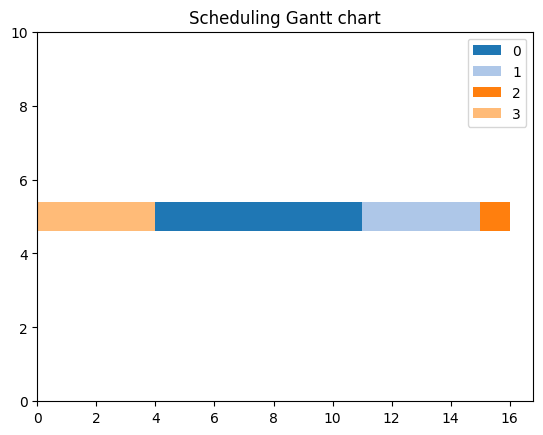

In [127]:
with open('./process.json','r') as f:
    data = json.load(f)

process = make_process(data)

ret = Priority_aging(process)
print(ret[1])
draw_schedule(ret[0])

### Priority preemptive

> 우선순위 방식에 선점형 특성을 더한다

> 새로운 프로세스 도착시 우선순위를 확인하여 높은 프로세스를 실행한다.

In [128]:
def Priority_pre(process) :
    
    
    # num of process
    pro_num = len(process)
    
    # total time
    running_time = 0
    
    # each process's left time
    left_time = [0] * pro_num
    
    for i in range(0,pro_num):
        left_time[i] = process[i]['burst_time']
    
    # running state's idx
    run_idx = -1
    
    # response time array
    res = [-1] * pro_num
    
    # terminate time
    term = [0] * pro_num
    
    f_check = 0
    
    hi_pri = -1
    
    idx_ret = list()
    
    ret = list()
    
    while(True):
        
        # 실행하던 프로세스가 끝나서 스케쥴링 하는 경우
        if(left_time[run_idx]==0):
            term[run_idx] = running_time
            hi_pri = -1
            for i in range(0,pro_num):
               if(process[i]['arrival_time']<=running_time):
                   if(left_time[i]>0):
                    if(hi_pri == -1 or process[i]['priority']<process[hi_pri]['priority']):
                       hi_pri = i
               
            run_idx = hi_pri
            if(res[run_idx]==-1):
                res[run_idx] = running_time
        
        # 새로운 프로세스가 들어와 스케쥴링 하는 경우
        for i in range(0,pro_num):
            if(process[i]['arrival_time'] == running_time):
                if(run_idx == -1):
                    run_idx = i
                    if(res[run_idx]==-1):
                        res[run_idx] = running_time
                else:
                    if(process[run_idx]['priority'] > process[i]['priority']):
                        run_idx = i
                        if(res[run_idx]==-1):
                            res[run_idx] = running_time
        
           
        
        idx_ret.append(run_idx)
        left_time[run_idx] = left_time[run_idx] - 1
        running_time = running_time +1
        
        for i in range(0,pro_num):
            f_check = f_check + left_time[i]
        
        if(f_check == 0):
            term[run_idx] = running_time
            break
        f_check = 0
    
    ret.append(idx_ret)
    
    criteria = list()
    
    utilization = len(idx_ret) / running_time
    throughput = pro_num / running_time
    temp1 = 0
    temp2 = 0
    temp3 = 0
    
    for i in range(0,pro_num):
        temp1 = temp1 + term[i] - process[i]['arrival_time']
        temp2 = temp2 + term[i] - process[i]['arrival_time'] - process[i]['burst_time']
        temp3 = temp3 + res[i] - process[i]['arrival_time']
    turnaround = temp1 / pro_num
    waiting = temp2/pro_num
    response = temp3/pro_num
    
    criteria.append({"utilization":utilization})
    criteria.append({"throughput":throughput})
    criteria.append({"turnaround":turnaround})
    criteria.append({"waiting":waiting})
    criteria.append({"response":response})
    
    ret.append(criteria)
    
    return ret

[{'utilization': 1.0}, {'throughput': 0.25}, {'turnaround': 8.75}, {'waiting': 4.75}, {'response': 4.75}]


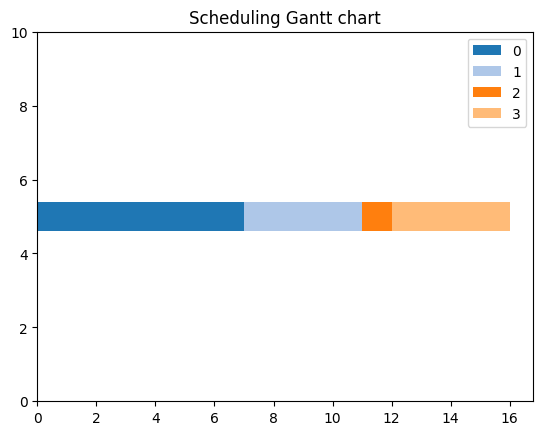

In [129]:
with open('./process.json','r') as f:
    data = json.load(f)

process = make_process(data)

ret = Priority_pre(process)
print(ret[1])
draw_schedule(ret[0])

### Priority preemptive (Aging)

> 2단위 시간에 1의 우선순위가 상승하도록 만들어준다.

In [130]:
def Priority_pre_aging(process) :
    

    
    # num of process
    pro_num = len(process)
    
    # total time
    running_time = 0
    
    # each process's left time
    left_time = [0] * pro_num
    
    for i in range(0,pro_num):
        left_time[i] = process[i]['burst_time']
    
    # running state's idx
    run_idx = -1
    
    # response time array
    res = [-1] * pro_num
    
    # terminate time
    term = [0] * pro_num
    
    f_check = 0
    
    hi_pri = -1
    
    idx_ret = list()
    
    ret = list()
    
    while(True):
        
        # 실행하던 프로세스가 끝나서 스케쥴링 하는 경우
        if(left_time[run_idx]==0):
           term[run_idx] = running_time
           hi_pri = -1
           for i in range(0,pro_num):
               if(process[i]['arrival_time']<=running_time):
                   if(left_time[i]>0):
                    if(hi_pri == -1 or process[i]['priority']<process[hi_pri]['priority']):
                       hi_pri = i
               
           run_idx = hi_pri
           if(res[run_idx]== -1):
               res[run_idx] = running_time
        
        # 새로운 프로세스가 들어와 스케쥴링 하는 경우
        for i in range(0,pro_num):
            if(process[i]['arrival_time'] == running_time):
                if(run_idx == -1):
                    run_idx = i
                    if(res[run_idx]== -1):
                        res[run_idx] = running_time
                else:
                    if(process[run_idx]['priority'] > process[i]['priority']):
                        run_idx = i
                        if(res[run_idx]== -1):
                            res[run_idx] = running_time
        
        # 범위를 돌며 2단위시간이 올라갈때마다 
        # 우선순위가 1씩 올라가도록 0.5씩 올려준다.
        # 또한, 기존에 돌아가던 것 보다 우선순위가 올라가더라도
        # 기본적으로 러닝스테이트에 있던 우선순위보다 낮으므로 
        # 에이징에 의한 상태변화는 주지 않는다.
        for i in range(0,pro_num):
            if(process[i]['arrival_time']<running_time):
                if(i != run_idx):
                    if(left_time[i] > 0):
                        process[i]['priority'] = process[i]['priority'] -0.5
            
           
        
        idx_ret.append(run_idx)
        left_time[run_idx] = left_time[run_idx] - 1
        running_time = running_time +1
        
        for i in range(0,pro_num):
            f_check = f_check + left_time[i]
        
        if(f_check == 0):
            term[run_idx] = running_time
            break
        f_check = 0
    
    ret.append(idx_ret)
    
    criteria = list()
    
    utilization = len(idx_ret) / running_time
    throughput = pro_num / running_time
    temp1 = 0
    temp2 = 0
    temp3 = 0
    
    for i in range(0,pro_num):
        temp1 = temp1 + term[i] - process[i]['arrival_time']
        temp2 = temp2 + term[i] - process[i]['arrival_time'] - process[i]['burst_time']
        temp3 = temp3 + res[i] - process[i]['arrival_time']
    turnaround = temp1 / pro_num
    waiting = temp2/pro_num
    response = temp3/pro_num
    
    criteria.append({"utilization":utilization})
    criteria.append({"throughput":throughput})
    criteria.append({"turnaround":turnaround})
    criteria.append({"waiting":waiting})
    criteria.append({"response":response})
    
    ret.append(criteria)
    
    return ret

[{'utilization': 1.0}, {'throughput': 0.25}, {'turnaround': 8.75}, {'waiting': 4.75}, {'response': 4.75}]


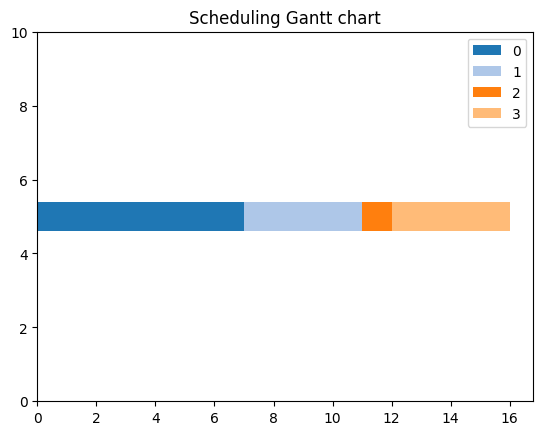

In [131]:
with open('./process.json','r') as f:
    data = json.load(f)

process = make_process(data)

ret = Priority_pre_aging(process)
print(ret[1])  
draw_schedule(ret[0])

### Round-Robin

> 선점형 방식

> quantum,q 에 따라 프로세스를 순차적으로 실행하는 방식

> quantum은 함수의 인자로 전달해준다.

In [132]:
def Round_Robin(process,quantum):
    
    # num of process
    pro_num = len(process)
    
    # total time
    running_time = 0
    
    # each process's left time
    left_time = [0] * pro_num
    
    for i in range(0,pro_num):
        left_time[i] = process[i]['burst_time']
    
    # running state's idx
    run_idx = -1
    
    # response time array
    res = [-1] * pro_num
    
    # terminate time
    term = [0] * pro_num
    
    # last time
    quantum_check = 0
    
    # finish check
    f_check = 0
    
    idx_ret = list()
    
    ret = list()
    
    while(True):
        
        for i in range(0,pro_num):
            f_check = f_check + left_time[i]
        
        if(f_check == 0):
            break
        f_check = 0
        
        if (run_idx == -1):
            run_idx = 0
            res[run_idx] = running_time
            

        
        idx_ret.append(run_idx)        
        left_time[run_idx] = left_time[run_idx] - 1
        running_time = running_time+1
        quantum_check = quantum_check +1
        
        
        if(quantum_check % quantum == 0):
            quantum_check = 0
            for i in range(0,pro_num):
                if(left_time[(run_idx + i + 1)%pro_num]>0):
                    run_idx = (run_idx + i + 1)%pro_num
                    if(res[run_idx]==-1):
                        res[run_idx] = running_time
                    break
        
        if(left_time[run_idx]==0):
            quantum_check = 0
            term[run_idx] = running_time
            for i in range(0,pro_num):
                if(left_time[(run_idx + i + 1)%pro_num]>0):
                    run_idx = (run_idx + i + 1)%pro_num
                    if(res[run_idx]==-1):
                        res[run_idx] = running_time
                    break
        
    ret.append(idx_ret)
    
    
    criteria = list()
    
    utilization = len(idx_ret) / running_time
    throughput = pro_num / running_time
    temp1 = 0
    temp2 = 0
    temp3 = 0
    
    for i in range(0,pro_num):
        temp1 = temp1 + term[i] - process[i]['arrival_time']
        temp2 = temp2 + term[i] - process[i]['arrival_time'] - process[i]['burst_time']
        temp3 = temp3 + res[i] - process[i]['arrival_time']
    turnaround = temp1 / pro_num
    waiting = temp2/pro_num
    response = temp3/pro_num
    
    criteria.append({"utilization":utilization})
    criteria.append({"throughput":throughput})
    criteria.append({"turnaround":turnaround})
    criteria.append({"waiting":waiting})
    criteria.append({"response":response})
    
    ret.append(criteria)
    
    return ret

[{'utilization': 1.0}, {'throughput': 0.024691358024691357}, {'turnaround': 112.0}, {'waiting': 71.5}, {'response': 27.0}]


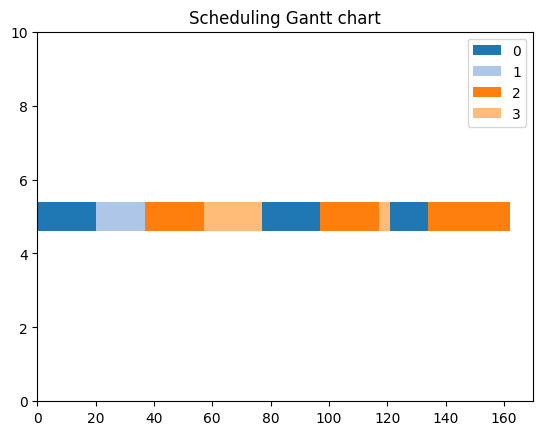

In [133]:
with open('./process3.json','r') as f:
    data = json.load(f)

process = make_process(data)


ret = Round_Robin(process,20)
print(ret[1])
draw_schedule(ret[0])

### Priority W/ Round-Robin

> 선점형

> 우선순위가 같은 프로세스간의 라운드 로빈 방식으로 프로세스를 진행한다

> quantum은 함수의 인자로 전달해준다.

In [134]:
def Priority_RR(process,quantum):
    
    # num of process
    pro_num = len(process)
    
    # total time
    running_time = 0
    
    # each process's left time
    left_time = [0] * pro_num
    
    for i in range(0,pro_num):
        left_time[i] = process[i]['burst_time']
    
    # running state's idx
    run_idx = -1
    
    # response time array
    res = [-1] * pro_num
    
    # terminate time
    term = [0] * pro_num
    
    # last time
    quantum_check = 0
    
    # finish check
    f_check = 0
    
    # priority를 정렬하여 저장
    # 하나씩 꺼내어 사용
    
    pri_set = list()
    
    for i in range(0,pro_num):
        if process[i]['priority'] not in pri_set:
            pri_set.append(process[i]['priority'])
    
    pri_set.sort()
    
    # 멀티 큐는 우선순위가 같은 작업끼리 모아둘
    # 리스트의 리스트 -> 이중 리스트를 저장하는 변수
    multi_que = list()
    
    idx_ret = list()
    
    ret = list()
    
    for i in range(0,len(pri_set)):
        que = list()
        for j in range(0,pro_num):
            if(pri_set[i] == process[j]['priority']):
                que.append(j)
        multi_que.append(que)
    

    
    # step은 멀티큐의 어느 단계에서 
    # 라운드 로빈을 실행하고 있는지 알려주는 변수
     
    step = 0
    
    # 우선 멀티큐의 모든 스텝을 for문으로 이어준다
    for step in range(0,len(multi_que)):
        
        cnt = len(multi_que[step])

        while(1):
            # 만약 runstate 가 비어있다면 
            # 첫 스텝의 0번 인덱스로 시작한다
            # -> 우선순위가 제일 높은 애중에 랜덤 실행
            # 또한 이 함수의 run idx는 실제 인덱스가 아닌 
            # 멀티레벨 내의 인덱스로 지정한다
            if(run_idx == -1):
                run_idx = 0
                res[multi_que[step][run_idx]] = running_time
            
            idx_ret.append(multi_que[step][run_idx])
            
            # print(multi_que[step][run_idx])
            
            # 런 스테이트의 남은 시간을 하나씩 줄여준다
            left_time[multi_que[step][run_idx]] = left_time[multi_que[step][run_idx]] - 1
            
            # 실제 동작 시간은 하나씩 늘리고
            running_time = running_time +1
            # 퀀텀 기준 시간도 하나씩 늘린다
            quantum_check = quantum_check +1
            
            if(left_time[multi_que[step][run_idx]]==0):
                term[multi_que[step][run_idx]] = running_time
            
            # 퀀텀 시간을 전부 채워 한 경우
            if(quantum_check % quantum == 0):
                # 퀀텀을 0으로 돌려준다
                quantum_check = 0    
                
                # 해당 스텝의 범위를 보면서 만약
                # 실행시간이 남은 프로세스가 있으면 런스테이트를 넘긴다
                for i in range(0,len(multi_que[step])):
                    if(multi_que[step][(run_idx + i+1)%(len(multi_que[step]))] > 0):
                        run_idx = (run_idx +1)%(len(multi_que[step]))
                        if(res[multi_que[step][run_idx]] == -1):
                            res[multi_que[step][run_idx]] = running_time
                        break
            
            # 런 스테이트가 시간을 다 한 경우
            if(left_time[multi_que[step][run_idx]]==0):
                
                # 퀀텀을 0으로 돌려준다
                quantum_check = 0
                for i in range(0,len(multi_que[step])):
                    if(multi_que[step][(run_idx + i+1)%(len(multi_que[step]))] > 0):
                        run_idx = (run_idx +1)%(len(multi_que[step]))
                        if(res[multi_que[step][run_idx]] == -1):
                            res[multi_que[step][run_idx]] = running_time
                        break
            # f_check를 이용하여 해당 step의 
            # 프로세스가 모두 끝났는지 확인한다
            # f_check로 해당 스텝의 모든 남은 시간을 더한다
            for i in range(0,len(multi_que[step])):
                f_check = f_check + left_time[multi_que[step][i]]
            if(f_check == 0):
                # 스텝이 끝난 경우 러닝스테이트를 비워주어
                # 다음 스텝에서 0번 인덱스부터 시작하게 해준다
                run_idx = -1
                break
            f_check = 0
            
 
    
    ret.append(idx_ret)
    
    criteria = list()
    
    utilization = len(idx_ret) / running_time
    throughput = pro_num / running_time
    temp1 = 0
    temp2 = 0
    temp3 = 0
    
    for i in range(0,pro_num):
        temp1 = temp1 + term[i] - process[i]['arrival_time']
        temp2 = temp2 + term[i] - process[i]['arrival_time'] - process[i]['burst_time']
        temp3 = temp3 + res[i] - process[i]['arrival_time']
    turnaround = temp1 / pro_num
    waiting = temp2/pro_num
    response = temp3/pro_num
    
    criteria.append({"utilization":utilization})
    criteria.append({"throughput":throughput})
    criteria.append({"turnaround":turnaround})
    criteria.append({"waiting":waiting})
    criteria.append({"response":response})
    
    ret.append(criteria)
    return ret

[{'utilization': 1.0}, {'throughput': 0.024691358024691357}, {'turnaround': 95.25}, {'waiting': 54.75}, {'response': 54.75}]


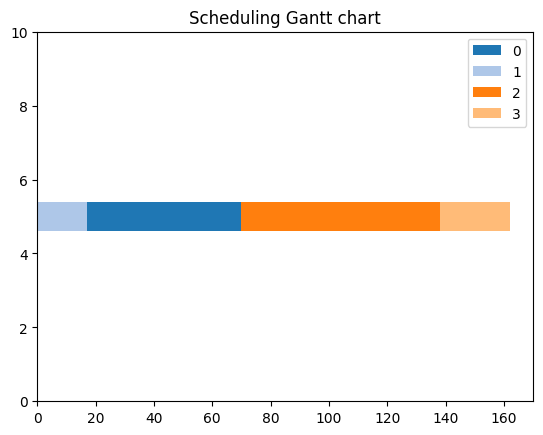

In [135]:
with open('./process3.json','r') as f:
    data = json.load(f)

process = make_process(data)

ret = Priority_RR(process,2)
print(ret[1])
draw_schedule(ret[0])

### (real-time) Rate-monotonic

> 실시간 스케쥴링

> 주기의 역수를 rate라 하며 이가 큰 값을 우선순위가 높은 프로세스로 취급한다

> 프로그램에서는 -2번 프로세스가 프로세스가 실행되지 않음을 나타낸다.


In [136]:
def Rate_mono(process):
 
    
    pro_num = len(process)
    
    hi_pri = 0
    
    run_idx = -1
    
    running_time = 0
    
    # each process's left time
    left_time = [0] * pro_num
    
    cnt = 0
    
    for i in range(0,pro_num):
        left_time[i] = process[i]['burst_time']
    
    f_check = 0
    fail = 0
    
    
    idx_ret = list()
    
    pre_run = -1
    
    while(True):
                
        for i in range(0,pro_num):
            if(left_time[i]>0):
                hi_pri = i
        for i in range(0,pro_num):
            if(left_time[i]>0):
                if(process[i]['periode'] < process[hi_pri]['periode']):
                    hi_pri = i
        
        for i in range(0,pro_num):
            f_check = f_check + left_time[i]
        if(f_check != 0):
            run_idx = hi_pri
            left_time[run_idx] = left_time[run_idx] -1   
        if(f_check == 0):
            run_idx = -2
        f_check = 0
        
        running_time = running_time +1

        
        
        for i in range(0,pro_num):
            if(running_time % process[i]['periode'] == 0):
                left_time[i] = left_time[i] + process[i]['burst_time']
                
               
                if(left_time[i] > process[i]['burst_time']):
                    fail = 1
        if (fail == 1):
            print("periode error")
        
        if(pre_run != -2 and run_idx == -2):
            cnt = cnt +1
        if(cnt==2):
            break
        
        idx_ret.append(run_idx)
        pre_run = run_idx
        
    # print(running_time)
    return idx_ret

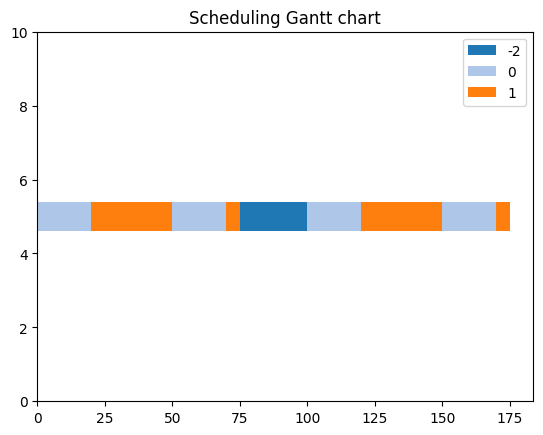

In [137]:
with open('./process2.json','r') as f:
    data = json.load(f)

process = make_process(data)

ret = Rate_mono(process)

draw_schedule(ret)

### (real-time) EDF

> 데드라인까지 남은 시간이 적은 프로세스를 실행한다

> 프로그램에서는 -2번 프로세스가 프로세스가 실행되지 않음을 나타낸다.

In [138]:
def EDF(process):
    
    pro_num = len(process)
    
    hi_pri = 0
    
    run_idx = -1
    
    running_time = 0
    
    # each process's left time
    left_time = [0] * pro_num
    
    cnt = 0
    
    for i in range(0,pro_num):
        left_time[i] = process[i]['burst_time']
    
    f_check = 0
    fail = 0
    
    
    idx_ret = list()
    
    pre_run = -1
    
    while(True):
        
        if(run_idx == -1):
            for i in range(0,pro_num):
                if(left_time[i]>0):
                    hi_pri = i
            for i in range(0,pro_num):
                if(left_time[i]>0):
                    if(process[hi_pri]['periode']>process[i]['periode']):
                        hi_pri = i
            run_idx = hi_pri
        
        if(left_time[run_idx] == 0):
            for i in range(0,pro_num):
                if(left_time[i]>0):
                    hi_pri = i
            for i in range(0,pro_num):
                if(left_time[i]>0):
                    if(process[hi_pri]['periode']>process[i]['periode']):
                        hi_pri = i
            run_idx = hi_pri
        
        for i in range(0,pro_num):
            f_check = f_check + left_time[i]
        if(f_check != 0):
            run_idx = hi_pri
            left_time[run_idx] = left_time[run_idx] -1   
        if(f_check == 0):
            run_idx = -1
        f_check = 0
        
        running_time = running_time +1

        
        
        for i in range(0,pro_num):
            if(running_time % process[i]['periode'] == 0):
                left_time[i] = left_time[i] + process[i]['burst_time']
             
                
                if(left_time[run_idx] > left_time[i]):
                    run_idx = i
                
                if(left_time[i] > process[i]['burst_time']):
                    fail = 1
        if (fail == 1):
            print("periode error")
        
        if(pre_run != -1 and run_idx == -1):
            break
        
        idx_ret.append(run_idx)
        pre_run = run_idx
        
    # print(running_time)
    return idx_ret

0


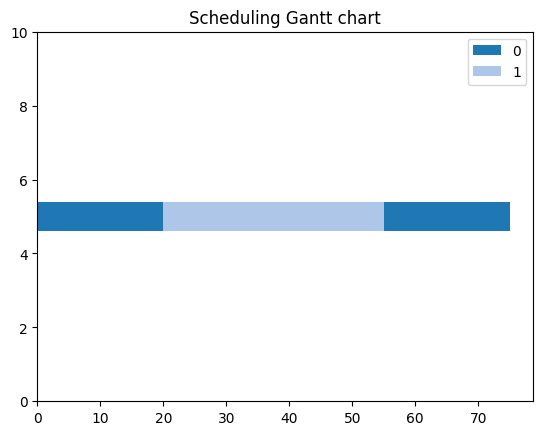

In [139]:
with open('./process2.json','r') as f:
    data = json.load(f)

process = make_process(data)

ret = EDF(process)
print(ret[1])
draw_schedule(ret)

### 종합평가 1. 선점 비선점 구별

> 선점식은 선점 식 끼리 비 선점식은 비선점끼리 비교합니다

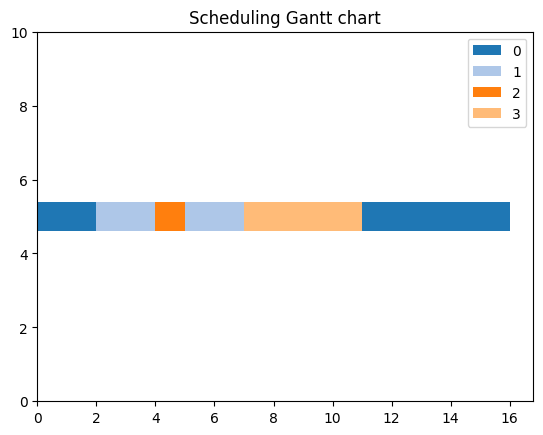

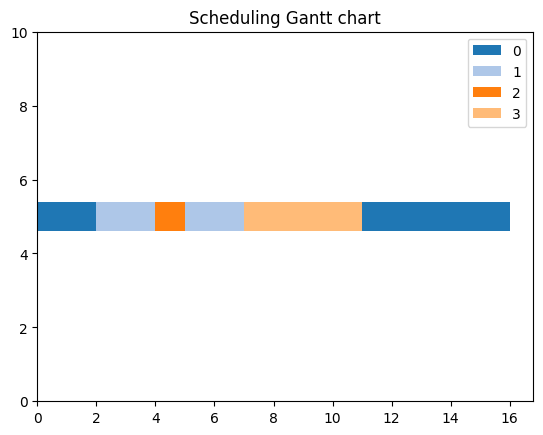

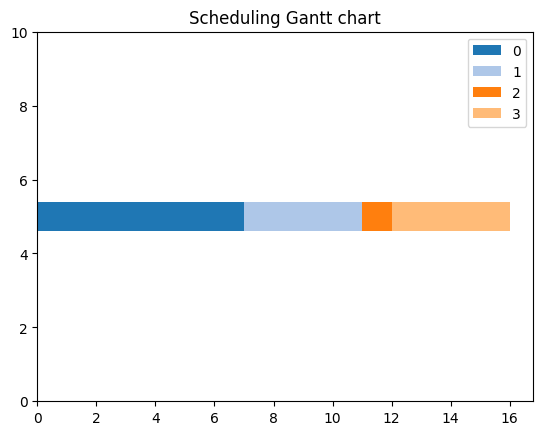

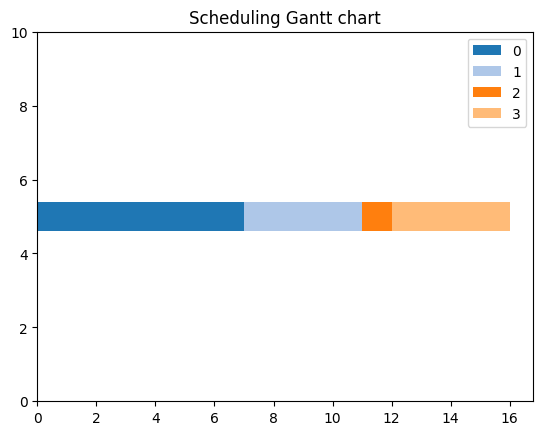

*들어온 데이터 셋은 preemptive 방식입니다.*
*SJF_pre, SRTF, Priority_pre, Priority_pre_aging*
*위의 4가지 방식을 비교합니다.*
**같은 데이터 셋을 비실시간 비교시 이용률과 처리율은 같으므로 제외합니다.**

turnaround time 이 가장 작은 스케쥴링 방식은  SJF_pre
waiting time 이 가장 작은 스케쥴링 방식은  SJF_pre
response time 이 가장 작은 스케쥴링 방식은  SJF_pre


In [195]:
with open('./process.json','r') as f:
    data = json.load(f)

process = make_process(data)

if(data['preemptive']['preemptive'] == 'non_preemptive'):
    fcfs_non_ret = FCFS(process)
    sjf_non_ret = SJF_non(process)
    pri_non_ret = Priority(process)
    pri_non_age_ret = Priority_aging(process)
    round_ret = Round_Robin(process,20)
    pri_w_rr_ret = Priority_RR(process,20)
    
    
    # print('FCFS\n',fcfs_non_ret[1])
    # print('SJF_non\n',sjf_non_ret[1])
    # print('Priority\n',pri_non_ret[1])
    # print('Priority_aging\n',pri_non_age_ret[1])
    # print('Round_Robin\n',round_ret[1])
    # print('Priority_RR\n',pri_w_rr_ret[1])
    
    data1 = {'name':'FCFS','data':fcfs_non_ret[1]}
    data2 = {'name':'SJF_non','data':sjf_non_ret[1]}
    data3 = {'name':'Priority','data':pri_non_ret[1]}
    data4 = {'name':'Priority_aging','data':pri_non_age_ret[1]}
    data5 = {'name':'Round_Robin','data':round_ret[1]}
    data6 = {'name':'Priority_RR','data':pri_w_rr_ret[1]}
    
    data_list = [data1, data2, data3, data4, data5, data6]
    
    draw_schedule(fcfs_non_ret[0])
    draw_schedule(sjf_non_ret[0])
    draw_schedule(pri_non_ret[0])
    draw_schedule(pri_non_age_ret[0])
    draw_schedule(round_ret[0])
    draw_schedule(pri_w_rr_ret[0])
    
    
    
    print("*들어온 데이터 셋은 non-preemptive 방식입니다.*")
    print("*FCFS, SJF_non, Priority, Priority_aging, Round_Robin, Priority_RR*")
    print("*위의 6가지 방식을 비교합니다.*")
    print("**같은 데이터 셋을 비실시간 비교시 이용률과 처리율은 같으므로 제외합니다.**\n")
    
    

    min_turnaround_data = min(data_list, key=lambda x: x['data'][2]['turnaround'])
    print("turnaround time 이 가장 작은 스케쥴링 방식은 ",min_turnaround_data['name'])
    
    min_wait_data = min(data_list, key=lambda x: x['data'][3]['waiting'])
    print("waiting time 이 가장 작은 스케쥴링 방식은 ",min_wait_data['name'])
    
    min_response_data = min(data_list, key=lambda x: x['data'][4]['response'])
    print("response time 이 가장 작은 스케쥴링 방식은 ",min_response_data['name'])
    
   
    
    
    
    
elif(data['preemptive']['preemptive'] == 'preemptive'):
    sjf_pre_ret = SJF_pre(process)
    srtf_ret = SRTF(process)
    pri_pre_ret = Priority_pre(process)
    pri_pre_age_ret = Priority_pre_aging(process)
    
    data1 = {'name':'SJF_pre','data':sjf_pre_ret[1]}
    data2 = {'name':'SRTF','data':srtf_ret[1]}
    data3 = {'name':'Priority_pre','data':pri_pre_ret[1]}
    data4 = {'name':'Priority_pre_aging','data':pri_pre_age_ret[1]}
    
    data_list = [data1, data2, data3, data4]
    
    
    
    
    draw_schedule(sjf_pre_ret[0])
    draw_schedule(srtf_ret[0])
    draw_schedule(pri_pre_ret[0])
    draw_schedule(pri_pre_age_ret[0])
    
    print("*들어온 데이터 셋은 preemptive 방식입니다.*")
    print("*SJF_pre, SRTF, Priority_pre, Priority_pre_aging*")
    print("*위의 4가지 방식을 비교합니다.*")
    print("**같은 데이터 셋을 비실시간 비교시 이용률과 처리율은 같으므로 제외합니다.**\n")
    
    

    min_turnaround_data = min(data_list, key=lambda x: x['data'][2]['turnaround'])
    print("turnaround time 이 가장 작은 스케쥴링 방식은 ",min_turnaround_data['name'])
    
    min_wait_data = min(data_list, key=lambda x: x['data'][3]['waiting'])
    print("waiting time 이 가장 작은 스케쥴링 방식은 ",min_wait_data['name'])
    
    min_response_data = min(data_list, key=lambda x: x['data'][4]['response'])
    print("response time 이 가장 작은 스케쥴링 방식은 ",min_response_data['name'])
    

### 종합평가 2. 전체 비교

> 모든 프로세스를 비교합니다.

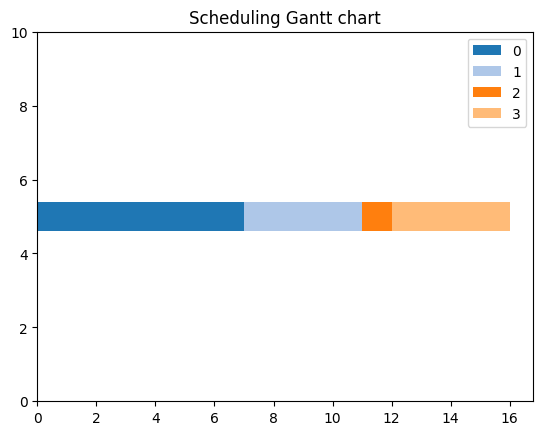

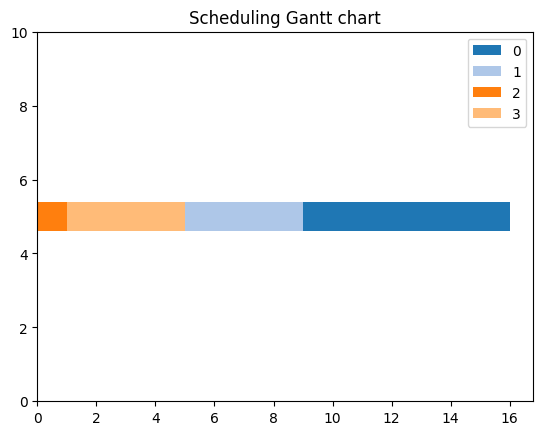

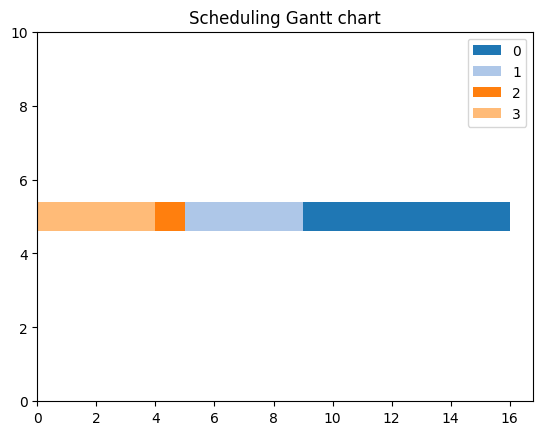

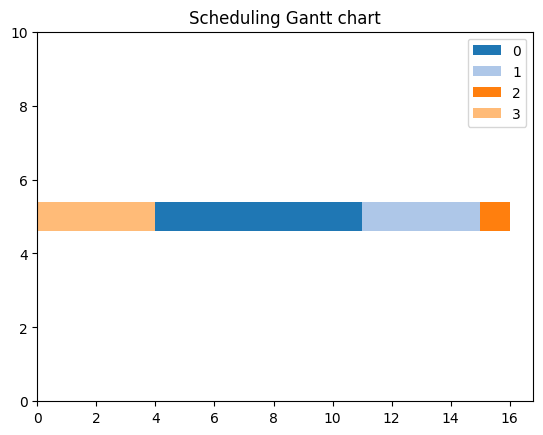

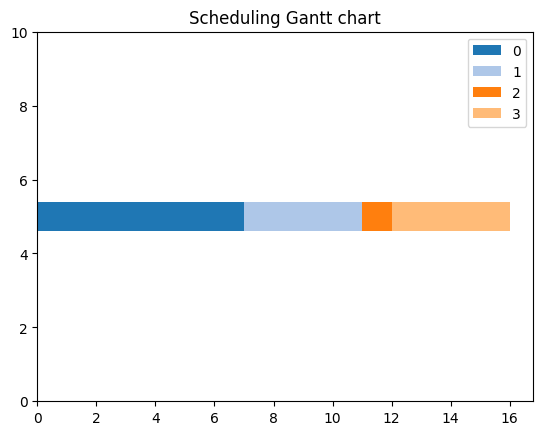

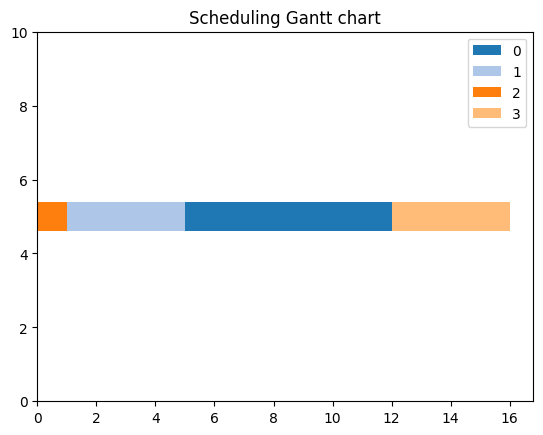

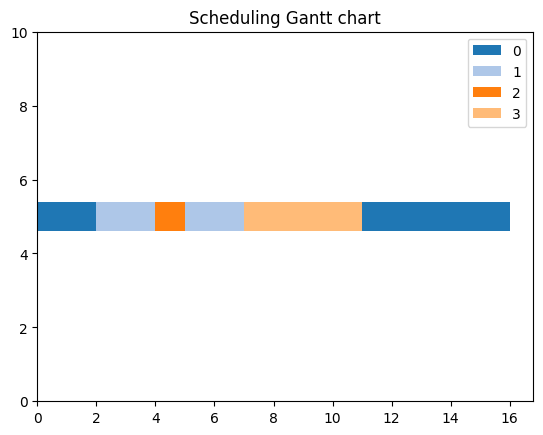

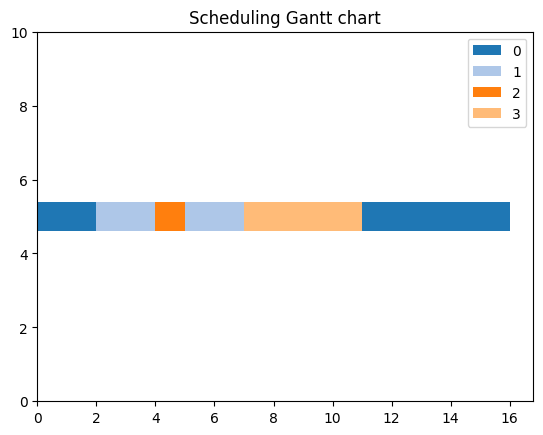

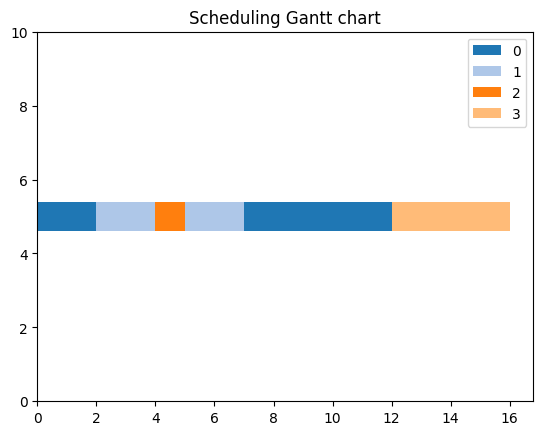

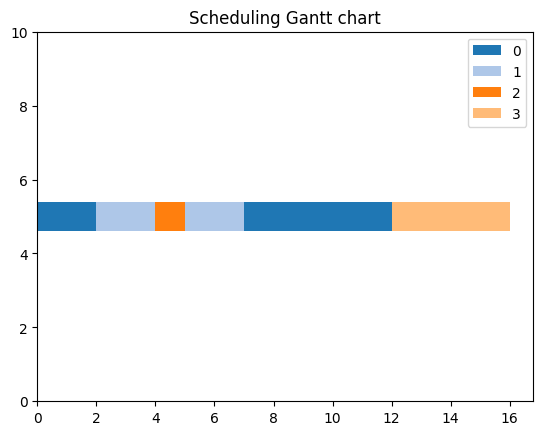

*FCFS, SJF_non, Priority, Priority_aging, Round_Robin, Priority_RR*
*SJF_pre, SRTF, Priority_pre, Priority_pre_aging*
*위의 10가지 방식을 비교합니다.*
**같은 데이터 셋을 비실시간 비교시 이용률과 처리율은 같으므로 제외합니다.**

turnaround time 이 가장 작은 스케쥴링 방식은  Priority_RR
waiting time 이 가장 작은 스케쥴링 방식은  Priority_RR
response time 이 가장 작은 스케쥴링 방식은  SJF_pre


In [196]:
with open('./process.json','r') as f:
    data = json.load(f)

process = make_process(data)

fcfs_non_ret = FCFS(process)
sjf_non_ret = SJF_non(process)
pri_non_ret = Priority(process)
pri_non_age_ret = Priority_aging(process)
round_ret = Round_Robin(process,20)
pri_w_rr_ret = Priority_RR(process,20)

sjf_pre_ret = SJF_pre(process)
srtf_ret = SRTF(process)
pri_pre_ret = Priority_pre(process)
pri_pre_age_ret = Priority_pre_aging(process)


# print('FCFS\n',fcfs_non_ret[1])
# print('SJF_non\n',sjf_non_ret[1])
# print('Priority\n',pri_non_ret[1])
# print('Priority_aging\n',pri_non_age_ret[1])
# print('Round_Robin\n',round_ret[1])
# print('Priority_RR\n',pri_w_rr_ret[1])

data1 = {'name':'FCFS','data':fcfs_non_ret[1]}
data2 = {'name':'SJF_non','data':sjf_non_ret[1]}
data3 = {'name':'Priority','data':pri_non_ret[1]}
data4 = {'name':'Priority_aging','data':pri_non_age_ret[1]}
data5 = {'name':'Round_Robin','data':round_ret[1]}
data6 = {'name':'Priority_RR','data':pri_w_rr_ret[1]}

data7 = {'name':'SJF_pre','data':sjf_pre_ret[1]}
data8 = {'name':'SRTF','data':srtf_ret[1]}
data9 = {'name':'Priority_pre','data':pri_pre_ret[1]}
data10 = {'name':'Priority_pre_aging','data':pri_pre_age_ret[1]}

data_list = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10]

draw_schedule(fcfs_non_ret[0])
draw_schedule(sjf_non_ret[0])
draw_schedule(pri_non_ret[0])
draw_schedule(pri_non_age_ret[0])
draw_schedule(round_ret[0])
draw_schedule(pri_w_rr_ret[0])
draw_schedule(sjf_pre_ret[0])
draw_schedule(srtf_ret[0])
draw_schedule(pri_pre_ret[0])
draw_schedule(pri_pre_age_ret[0])




print("*FCFS, SJF_non, Priority, Priority_aging, Round_Robin, Priority_RR*")
print("*SJF_pre, SRTF, Priority_pre, Priority_pre_aging*")
print("*위의 10가지 방식을 비교합니다.*")
print("**같은 데이터 셋을 비실시간 비교시 이용률과 처리율은 같으므로 제외합니다.**\n")



min_turnaround_data = min(data_list, key=lambda x: x['data'][2]['turnaround'])
print("turnaround time 이 가장 작은 스케쥴링 방식은 ",min_turnaround_data['name'])

min_wait_data = min(data_list, key=lambda x: x['data'][3]['waiting'])
print("waiting time 이 가장 작은 스케쥴링 방식은 ",min_wait_data['name'])

min_response_data = min(data_list, key=lambda x: x['data'][4]['response'])
print("response time 이 가장 작은 스케쥴링 방식은 ",min_response_data['name'])

    